# 6.0 - Regressão

A regressão é um tipo de modelo usado em machine learning, mas especificamente no enisno supervisionado. É definido pelo uso de preditores e a sua saída de dados é númerica, ou seja, neste tipo de modelo é usado valores númericos, como por exemplo a idade, o peso, o salário, etc.

Como já foi comentado sobre a diferença entre a Classificação e Regressão, se você quiser rever a diferença, clique [aqui](https://github.com/Finnkell/ml-algos-cedeteg/blob/main/roteiro_de_estudos/5_classificacao/bruno_oliveira/5.0%20Classifica%C3%A7%C3%A3o.ipynb).

## 6.1 - Regressão linear:

A regressão linear é um dos modelos mais conhecidos da regressão. Um conceito ligado com esse modelo é a [Correlação](https://github.com/Finnkell/ml-algos-cedeteg/blob/main/roteiro_de_estudos/4_data_prep/bruno_oliveira/4.0%20Data%20Prep.ipynb), pois a regressão consegue descrever a relação através de uma equação, enquanto a correlação descreve a força de correlação entre as variáveis. A regressão linear é definida pela seguinte fórmula: 
$$y = b_{0} + b_{1} * x_{1}$$
Onde:
* $y$ = valor previsto;
* $b_{0}$: constante, ou coeficiente que corta o eixo y;
* $b_{1}$: coeficiente que define a inclinação da reta;
* $x_{1}$: variável preditora.

A regressão linear tem como objetivo encontrar a melhor predição possível, ou seja, com o menor erro possível da predição de y com base em X. A imagem abaixo ilustra a regressão linear aplicada sobre um conjunto de dados:

<img src="https://s.dicionariofinanceiro.com/imagens/normdist-regression.jpg"></img>

Existem métricas que avaliam os erros de predição sobre os modelos de regressão, entre eles temos o MSE, o MAE, etc. Se você deseja saber mais sobre essas métricas, você pode encontrar um arquivo mais detalhado [aqui](https://github.com/Finnkell/ml-algos-cedeteg/blob/main/roteiro_de_estudos/3_avaliacao_de_modelos/bruno_oliveira/3.1%20M%C3%A9tricas%20de%20avalia%C3%A7%C3%A3o%20de%20modelos%20Accuracy%2C%20Precision%2C%20Recall%2C%20F1%2C%20AUC%2C%20Gini%2C%20K-S%2C%20R2%2C%20MAE%2C%20RMSE.ipynb).

O exempo abaixo mostra o uso de um modelo de regressão linear simples:

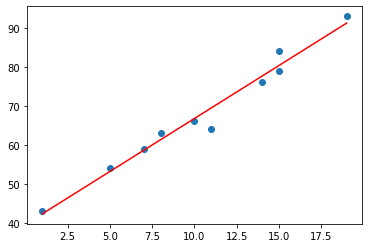

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1,5,7,8,10,11,14,15,15,19]).reshape((-1,1))
y = np.array([43,54,59,63,66,64,76,79,84,93])

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')

## 6.2 - Regularização L1 e L2:

Dentro dos modelos, sempre buscamos uma boa relação entre o viés e a variância. E a regularização tem como objetivo inserir mais viés nos modelos, desta maneira reduzindo a variância e diminuindo a chance de ocorrer overfitting. Temos duas formas principais de regularização: o L1 e o L2, que são definidos por gerar certas penalidades ao modelo, desta maneira evitando o overfitting e melhorando a nossa predição.

* **Regularização L1 ou Lasso**: esta primeira penalização é definida por aplicar uma penalidade equivalente ao valor absoluto da magnitude dos coeficientes, ou seja, ele vai aplicar uma uma restrição aos coeficientes menos importantes, levando-os a zero. Abaixo está ilustrado a soma residual dos quadrados utilizando a penalidade L1:

<img src="https://miro.medium.com/max/1070/1*dynW6DLJxX2iaMrnfgxk_A.png"></img>

* **Regularização L2 ou Ridge**: esta penalização consiste em elevar as variáveis ao quadrado. Deste modo os coeficientes das features que estão interligadas, poderão ter resultados parecidos, ou até mesmo um coeficiente alto, enquanto o outro coeficiente seria 0. Abaixo está ilustrado a soma residual dos quadrados utilizando a penalidade L2:

<img src="https://miro.medium.com/max/1060/1*_2_bFm9NkDrOmfOYs5lNFA.png"></img>

* **Elastic Net ou L1 + L2:** Ainda temos um modelo chamado Elastic Net que combina as duas regularizações anteriores, e desta foram ele consegue extrair o melhor das duas penalidades. Abaixo está ilustrado a soma residual dos quadrados utilizando o Elastic Net:

<img src="https://miro.medium.com/max/693/1*elv_EM7V-1QvnVkD0Mmk8Q.png"></img>

Agora que já vimos as principais características das regularizações, vamos observar por meio de uma ilustração, a diferença entre os três modelos anteriores:

<img src="https://miro.medium.com/max/1400/1*yMPr7TAIVBx0FlK5kbMJnw.png"></img>

No exemplo abaixo, foi usado a base de dados 'Boston House Price', que indica os preços das casas de Boston. E foi aplicado o modelo do Lasso nesse conjunto de dados:

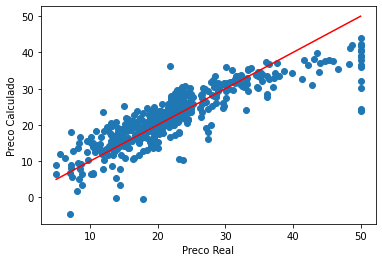

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso

boston = load_boston()

df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['Price'] = boston.target

X = df.drop('Price', axis=1)
y = df['Price']    

lasso = Lasso(alpha=0.13)
lasso.fit(X, y)
predito = lasso.predict(X)

plt.scatter(y, predito)
range = [y.min(), y.max()]
plt.plot(range, range, 'red')
plt.xlabel("Preco Real")
plt.ylabel("Preco Calculado")
plt.show()

Neste próximo exemplo, usamos um conjunto de dados que traz informações sobre o consumo de combustível em alguns tipos de carros, e usamos o Ridge sobre esse dataset: 

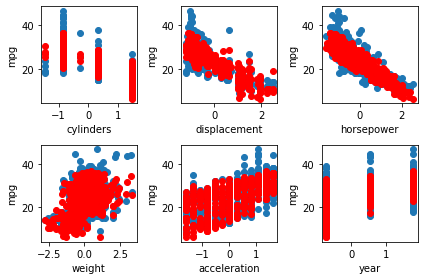

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

dados = pd.read_csv('Regresao_Lasso_Ridge.csv')
dados = dados.drop('name',axis=1)
dados['horsepower'] = pd.to_numeric(dados['horsepower'], errors='coerce')
dados = dados.dropna()

normalizador = StandardScaler()
dados[['cylinders', 'displacement', 'horsepower','weight', 'acceleration', 
       'year', 'origin']] = normalizador.fit_transform(dados[['cylinders','displacement',
                                                              'horsepower', 'weight','acceleration',
                                                              'year', 'origin']])
X = dados.drop('mpg',axis=1).values
y = dados['mpg'].values

ridge = Ridge(alpha=0.001) #0.001
ridge.fit(X, y)
y_pred = ridge.predict(X)

fig, ax = plt.subplots(2, 3)
ax[0,0].scatter(X[:,0],y);
ax[0,0].scatter(X[:,0],y_pred,color='red');
ax[0,0].set_xlabel('cylinders');
ax[0,0].set_ylabel('mpg');

ax[0,1].scatter(X[:,1],y);
ax[0,1].scatter(X[:,1],y_pred,color='red');
ax[0,1].set_xlabel('displacement');
ax[0,1].set_ylabel('mpg');

ax[0,2].scatter(X[:,3],y);
ax[0,2].scatter(X[:,3],y_pred,color='red');
ax[0,2].set_xlabel('horsepower');
ax[0,2].set_ylabel('mpg');

ax[1,0].scatter(X[:,4],y);
ax[1,0].scatter(X[:,4],y_pred,color='red');
ax[1,0].set_xlabel('weight');
ax[1,0].set_ylabel('mpg');

ax[1,1].scatter(X[:,5],y);
ax[1,1].scatter(X[:,5],y_pred,color='red');
ax[1,1].set_xlabel('acceleration');
ax[1,1].set_ylabel('mpg');

ax[1,2].scatter(X[:,6],y);
ax[1,2].scatter(X[:,6],y_pred,color='red');
ax[1,2].set_xlabel('year');
ax[1,2].set_ylabel('mpg');

plt.tight_layout();

## 6.3 - Árvore de regressão:

Uma árvore de regressão deriva do conceito de uma [árvore de decisão](https://github.com/Finnkell/ml-algos-cedeteg/blob/main/roteiro_de_estudos/5_classificacao/bruno_oliveira/5.0%20Classifica%C3%A7%C3%A3o.ipynb), porém agora estamos tratando de dados quantitativos (numéricos) e não dados qualitativos (categóricos). A árvore de regressão faz uma análise nas variáveis mais importantes, e com base nisso ela cria uma árvore de decisão que vai prever valores para uma variável contínua. Outra característica da árvore de regressão, é que o valor dos nós de término, são médias das suas observações. A imagem abaixo mostra uma árvore com as variáveis numéricas:

<img src="http://cienciadedados.uff.br/wp-content/uploads/sites/195/2020/04/image-21.png" width="400px"></img>

Possuimos alguns algoritmos usados na árvore de regressão:

### ID3 (Interactive Dichotomiser):
É baseado na idéia da entropia, ou seja, representa a aleatoriedade do conjunto de dados. O seu objetivo é escolher o melhor corte no dataset para escolher qual é o melhor subconjunto, para isso é usado o **ganho de informação**, que mede o valor da entropia após o corte, ou seja, o quanto nosso dataset é puro (uma alta pureza implica em um conjunto de dados com valores iguais). Abaixo temos um exemplo que consegue explicar essa relação entre entropia e ganho de informação:

<img src="https://miro.medium.com/max/2000/1*OmFgPYbtMsOQdK6rOiRVEw.png" width="500px"></img>

Exemplo (a):
* Corte considerando a cor das figuras do dataset;
* Entropia baixa, pois os dados têm uma aleatoriedade baixa;
* Ganho de informação é alto.

Exemplo (b):
* Corte considerando a transparência das figuras do dataset;
* Entropia mais alta que o exemplo a;
* Ganho de informação é baixo.

---

### CART (Classification and Regression Tree):
Algoritmo que usa a probabilidade ao invés da entropia. Mais precisamente, ele usa a impureza de Gini como a probabilidade de duas observações aleatórias do dataset terem classificações diferentes.
Ou seja, esse algoritmo pode ser utilizado para predizer os valores numéricos. Para fazer isso, a sua divisão deseja encontrar grupos com resultados similares, e a média resultante é usada para fazer a predição. O exemplo a seguir ilustra o uso da probabilidade de eventos para predizer os resultados:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Decision_Tree.jpg/500px-Decision_Tree.jpg"></img>

O exemplo abaixo ilustra uma árvore de regressão sobre o conjunto de dados das casas de Boston:

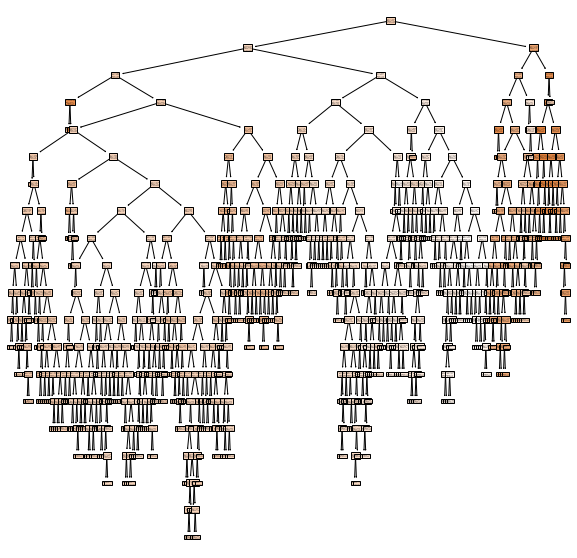

In [47]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston

boston = load_boston()

df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['Price'] = boston.target

X = df.drop('Price', axis=1)
y = df['Price'] 

reg = DecisionTreeRegressor()
bostonTree = reg.fit(X, y)

allScores = cross_val_score(reg, X, y , cv=10)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(bostonTree, filled=True);

## 6.4 - Análise de resíduos:

Já vimos anteriormente que a predição feita pelos modelos de regressão não é 100% correta, e se por acaso fosse uma análise sem erros, teríamos um overfiting que é o ajuste excessivo aos dados. Ou seja, a predição gera erros e essa distância entre os dados reais e os valores preditos é conhecida como resíduos. A imagem abaixo ilustra o que são resíduos em uma regressão:

<img src="https://i.imgur.com/mVRWWbg.png" width="500px"></img>

Com base nisso, para saber se os modelos estão sendo aplicados corretamente, precisamos que algumas condições sejam satisfeitas:

* **Normalidade:** Os resíduos gerados precisam seguir uma distribuição normal. Podemos verificar isso, através de um gráfico, ou podemos usar um teste estatístico chamado Teste de Shapiro-Wilk, que  afirma que existe normalidade se o valor de p é maior que 0.05, caso contrário os resíduos não estão normalizados. Ex:

<img src="https://miro.medium.com/max/700/1*zz9rr_6JFn67WTR7W4p7RQ.png" width="500px"></img>


* **Homocedasticidade:** A variância de Y precisa ser constante para todos os valores de X. Podemos fazer essa verificação também por meio de um gráfico e usando os testes estatísticos: Teste Goldfeld-Quandt, Teste de Breusch-Pagan e pelo Teste de White. Ex:

<img src="https://miro.medium.com/max/700/1*jbPACOcXGdcHJ6lU35jSFg.png" width="500px"></img>


* **Independência:** Não podemos ter dependência entre os dados, desta maneira os resíduos são independentes e igualmente distribuidos.

## 6.5 - Modelos lineares generalizados (MLG):

Esse tipo de abordagem foi criada como sendo uma extensão dos modelos de regressão linear simples e múltiplas. Através dela não ficamos limitados a usar os conceitos de Independência, Homocedasticidade e Normalidade, pois conseguimos usar outras distribuições para os erros e uma função de ligação que lineariza a relação entre as variáveis X e Y. Abaixo temos um exemplo de um modelo linear generalizado:

<img src="https://i0.wp.com/operdata.com.br/wp-content/uploads/2020/04/artigocorpo-18-1.jpg" width="300px"></img>

Algumas das distribuições usadas pela classe MLG são as seguintes:

* **Poisson:** são usadas para modelar os dados de contagem, por exemplo: o número de clientes de uma empresa ou até mesmo o número de novas pessoas cadastradas em uma corretora, que estão investindo na bolsa. Essa função consegue impedir que novos resultados negativos ocorram e também gera boas interpretações a partir do exponencial dos coeficientes.

* **Bernoulli:** é um tipo de distribuição que gera resultados binários (Sim ou Não). Quando a função de ligação logit, ela passa a ser conhecida como [Regressão Logística](https://github.com/Finnkell/ml-algos-cedeteg/blob/main/roteiro_de_estudos/5_classificacao/bruno_oliveira/5.0%20Classifica%C3%A7%C3%A3o.ipynb). Esse tipo de regressão é muito usada na escolha de concessão de crédito para usuários de um banco, pois através de dados numéricos dos clientes o modelo ao final responde com Sim ou Não.

* **Gama:** usada para modelar dados positivos e assimétricos. Ao contrário da regressão de Poisson, a regressão Gama, modela as variáveis contínuas. E nesse tipo de regressão a função de ligação usada é logaritmica. Esse modelo é muito usado para estudar o preço de imóveis através de alguns fatores que influenciam esse valor.

No exemplo abaixo, não usamos a biblioteca statsmodel (acesse este [site](https://www.statsmodels.org/stable/examples/notebooks/generated/glm.html) para poder ter um exemplo mais complexo do MLG), porém utilizamos o conceito de MLG usando a distribuição de Poisson sobre o dataset das casas de Boston. Também usamos a função de ligação de Poisson que é o log para visualizar os dados:

<ipython-input-52-a0d4a48dbe8e>:20: RuntimeWarning: invalid value encountered in log
  mlg_poisson = np.log(predito)


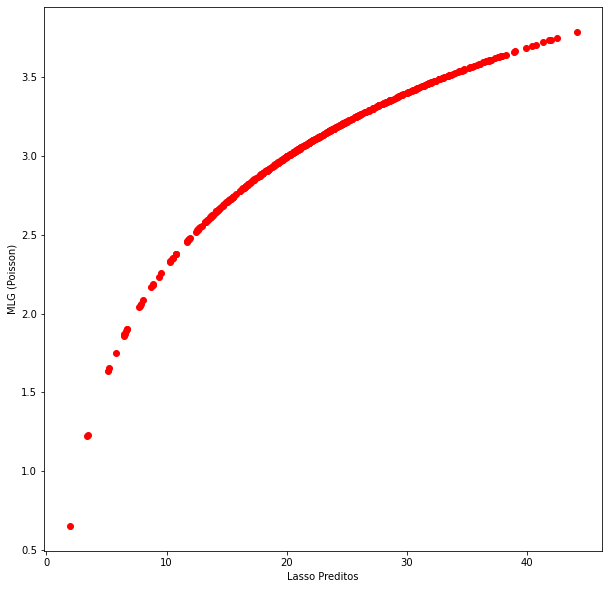

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso

boston = load_boston()

df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['Price'] = boston.target

X = df.drop('Price', axis=1)
y = df['Price']    

lasso = Lasso(alpha=0.13)
lasso.fit(X, y)
predito = lasso.predict(X)

mlg_poisson = np.log(predito)

plt.figure(figsize=[10,10])
plt.scatter(x=predito, y=mlg_poisson, color = 'red')
plt.xlabel('Lasso Preditos')
plt.ylabel('MLG (Poisson)')
plt.show();